# <b><span style="color:red"> Preprocessing Google's 10k most common words</span></b>

#### This notebook wrangles the data inside the google-10000-english.txt file which consists of 10,000 most common English words in order of frequency. The modification in the file is done to match the pattern of the given data

In [1]:
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:

#fetching the file from github and storing the words  in a list
link='https://raw.githubusercontent.com/first20hours/google-10000-english/master/google-10000-english.txt'

download = requests.get(link)

words = download.text.split('\n')
print(words[:10])

['the', 'of', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that']


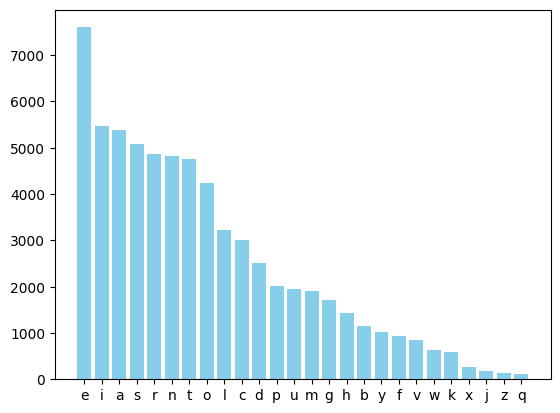

In [3]:
#get the freq of all chars in the list and plotting it
char_freq={}
for word in words:
    for char in word:
        if char in char_freq:
            char_freq[char] += 1
        else:
            char_freq[char] = 1
#create a sorted dictionary
sorted_char_freq = dict(sorted(char_freq.items(), key=lambda item: item[1], reverse=True))
plt.bar(range(len(sorted_char_freq)), list(sorted_char_freq.values()), align='center',color='skyblue')
plt.xticks(range(len(sorted_char_freq)), list(sorted_char_freq.keys()));


### Observation ###
    -  The file consists of only smallcase letters 
    -  In order to make it similar to train data we have to add uppercase characters ,numbers and puctutations to it

In [4]:
#take 15% of the words and capitalize the first letter
#take 5% of the data and add a punctuation mark . ? or .
#take 5% of the data and add a random number between 1 and 9
import random
import string
import math
random.seed(42)
num_words = len(words)
num_words_to_capitalize = math.ceil(num_words * 0.15) 
words_to_capitalize = random.sample(words, num_words_to_capitalize)
num_words_to_punctuate = math.ceil(num_words * 0.05)
words_to_punctuate = random.sample(words, num_words_to_punctuate)
num_words_to_add_number = math.ceil(num_words * 0.05)
words_to_add_number = random.sample(words, num_words_to_add_number)
#remove those words from the text file and write the capitalized words to a new file
for word in words:
    if word in words_to_capitalize:
        try:
            words.remove(word)
        except:
            pass
        words.append(word.capitalize())
    if word in words_to_punctuate:
        try:
            words.remove(word)
        except:
            pass
        words.append(word + random.choice('.,?'))
    if word in words_to_add_number:
        try:
            words.remove(word)
        except:
            pass
        words.append(word + str(random.randint(1, 9)))

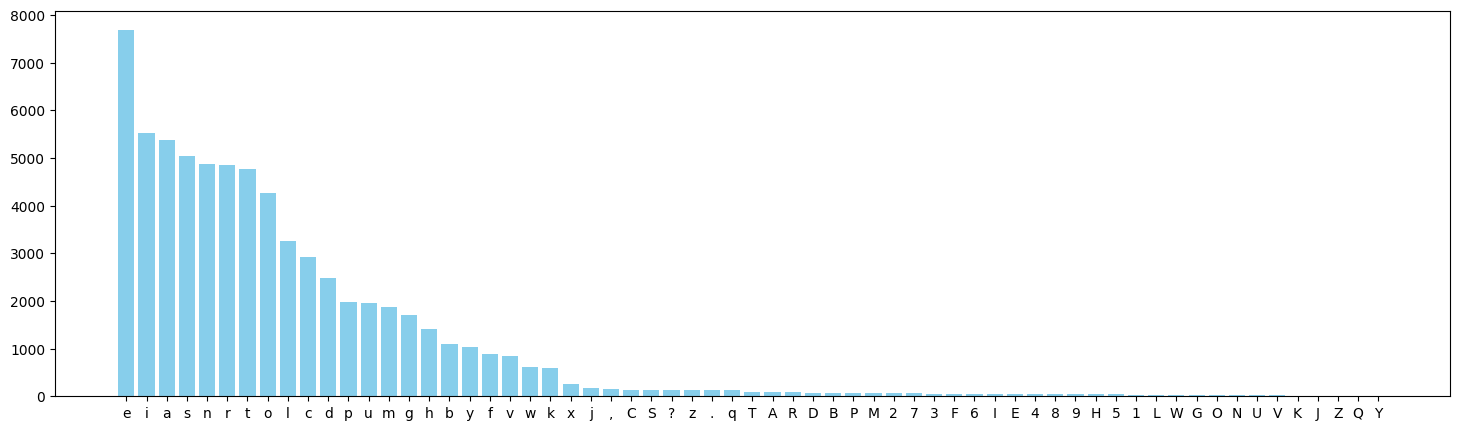

In [5]:
#get the freq of all chars in the modified list and plotting it
char_freq={}
for word in words:
    for char in word:
        if char in char_freq:
            char_freq[char] += 1
        else:
            char_freq[char] = 1
#create a sorted dictionary
sorted_char_freq = dict(sorted(char_freq.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(18, 5))
plt.bar(range(len(sorted_char_freq)), list(sorted_char_freq.values()), align='center',color='skyblue')
plt.xticks(range(len(sorted_char_freq)), list(sorted_char_freq.keys()));


### Observations ###
    - The new distribution is very similar to the char freq in the training data
    - We can use the words in the preprocessed file to generate new data that that similar distribution to the train data

In [6]:

#write the capitalized words to a new file
dataset_path=(os.path.join('../project_files'))
with open(os.path.join(dataset_path,'google-10000-english-preprocessed.txt'), 'w')as file:
    for word in words:
        file.write(word + '\n')
print('Preprocessed file created successfully')
file.close()

Preprocessed file created successfully
